# PK Modelling Project - Mirtazapine
Regression Analysis for k values

In [31]:
# Import basic dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import time
import pickle

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# Graph settings
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Neue Einstellung'
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['font.size'] = 12
mpl.rc('axes', titlesize=18, titleweight=20, labelsize=14, facecolor=[0.9,0.9,0.9], edgecolor=[0.5, 0.5, 0.5], linewidth=0.5)
mpl.rc('xtick', labelsize=12, color=[0.3,0.3,0.3])
mpl.rc('ytick', labelsize=12)
mpl.rc('lines', linewidth=3, markersize=10)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', axisbelow=True)
savefigOpts = {'dpi': 100, 'transparent': True}

font_dirs = [r'C:\Users\klty0\Dropbox\Holmusk\Holmusk Templates\Fonts', ]
#font_dirs = [r'C:\Users\Kenneth Leung\Dropbox\Holmusk\Holmusk Templates\Fonts', ]
font_files = mpl.font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = mpl.font_manager.createFontList(font_files)
mpl.font_manager.fontManager.ttflist.extend(font_list)

### Import datasets

In [3]:
df_single = pd.read_excel("Final k values V3 (Single Dosing) - Fixed ka.xlsx")

In [4]:
df_multi = pd.read_excel("Final k values V3 (Multiple Dosing).xlsx")

In [5]:
df_combined = df_single.append(df_multi)

In [6]:
df_combined.head()

,subject_id,k_values,error,bounds,ka,Bmax_k12,k21,ke,KM,Cmax_mean,...,Tmax_sd,AUC_mean,AUC_sd,reference,dosing,dose,female,age_mean,age_sd,V1
0,3,[12.60989622 0.84997925 0.22251457],0.040925,"[(8.0, 35.0), (0.1, 0.85), (0.05, 0.25)]",0.85,12.609896,0.849979,0.222515,14.3,31.6,...,0.71,216,46,22,Single,15,0,25,4,152
1,6,[34.78024573 0.85 0.20873623],0.021523,"[(8.0, 35.0), (0.1, 0.85), (0.05, 0.25)]",0.85,34.780246,0.850000,0.208736,14.3,32.1,...,0.65,355,199,25,Single,20,0,33,6,152
2,7,[8.00097254 0.13980983 0.10196638],0.020804,"[(8.0, 35.0), (0.1, 0.85), (0.05, 0.25)]",0.85,8.000973,0.139810,0.101966,14.3,48.4,...,0.74,647,294,25,Single,20,0,69,3,152
3,15,[21.69242775 0.40671031 0.11341312],0.021796,"[(8.0, 35.0), (0.1, 0.85), (0.05, 0.25)]",0.85,21.692428,0.406710,0.113413,14.3,36.9,...,1.00,673,248,25,Single,20,1,40,8,152
4,16,[10.71821793 0.16022135 0.08930014],0.014158,"[(8.0, 35.0), (0.1, 0.85), (0.05, 0.25)]",0.85,10.718218,0.160221,0.089300,14.3,45.6,...,1.64,770,270,25,Single,20,1,68,3,152


In [7]:
# Keeping only the relevant columns
df_final = df_combined[['ka','Bmax_k12','k21','ke', 'KM','female','age_mean']]

In [8]:
df_final

,ka,Bmax_k12,k21,ke,KM,female,age_mean
0,0.850000,12.609896,0.849979,0.222515,14.3,0,25
1,0.850000,34.780246,0.850000,0.208736,14.3,0,33
2,0.850000,8.000973,0.139810,0.101966,14.3,0,69
3,0.850000,21.692428,0.406710,0.113413,14.3,1,40
4,0.850000,10.718218,0.160221,0.089300,14.3,1,68
0,0.420116,13.145824,0.238591,0.192241,14.3,0,25
1,2.041866,14.040124,0.055239,0.234723,14.3,0,25
2,0.690860,37.319508,0.310932,0.262608,14.3,0,33
3,0.274568,30.969193,0.155371,0.144918,14.3,0,69
4,0.503835,32.233391,0.215479,0.258735,14.3,0,24


In [9]:
df_single_final = df_single[['ka','Bmax_k12','k21','ke', 'KM','female','age_mean']]
df_multi_final = df_multi[['ka','Bmax_k12','k21','ke', 'KM','female','age_mean']]

#### Group by Age and Gender

In [10]:
df_final_grp = df_final.groupby(["age_mean","female"]).mean()
df_final_grp = df_final_grp.reset_index()

In [11]:
df_final_grp

,age_mean,female,ka,Bmax_k12,k21,ke,KM
0,24,0,0.503835,32.233391,0.215479,0.258735,14.3
1,25,0,0.661451,36.354726,0.276500,0.190898,14.3
2,33,0,0.770430,36.049877,0.580466,0.235672,14.3
3,40,1,0.659033,48.342122,0.361565,0.120269,14.3
4,68,1,0.641662,41.353459,0.190699,0.100254,14.3
5,69,0,0.562284,19.485083,0.147591,0.123442,14.3


In [12]:
df_final_single_grp = df_single_final.groupby(["age_mean","female"]).mean()
df_final_single_grp = df_final_single_grp.reset_index()

In [13]:
df_final_single_grp

,age_mean,female,ka,Bmax_k12,k21,ke,KM
0,25,0,0.85,12.609896,0.849979,0.222515,14.3
1,33,0,0.85,34.780246,0.850000,0.208736,14.3
2,40,1,0.85,21.692428,0.406710,0.113413,14.3
3,68,1,0.85,10.718218,0.160221,0.089300,14.3
4,69,0,0.85,8.000973,0.139810,0.101966,14.3


In [14]:
df_final_multi_grp = df_multi_final.groupby(["age_mean","female"]).mean()
df_final_multi_grp = df_final_multi_grp.reset_index()

In [15]:
df_final_multi_grp

,age_mean,female,ka,Bmax_k12,k21,ke,KM
0,24,0,0.503835,32.233391,0.215479,0.258735,14.3
1,25,0,0.630026,40.312197,0.180921,0.185629,14.3
2,33,0,0.690860,37.319508,0.310932,0.262608,14.3
3,40,1,0.468066,74.991816,0.316420,0.127125,14.3
4,68,1,0.433325,71.988701,0.221176,0.111207,14.3
5,69,0,0.274568,30.969193,0.155371,0.144918,14.3


# Combined (Single + Multi Dosing)

### Basic Plots

In [32]:
x = df_final_grp.age_mean

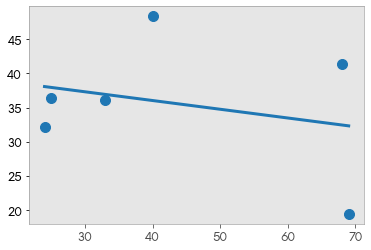

In [33]:
y = df_final_grp.Bmax_k12
plt.scatter(x, y);
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)));

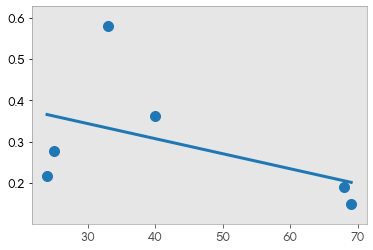

In [34]:
y = df_final_grp.k21
plt.scatter(x, y);
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)));

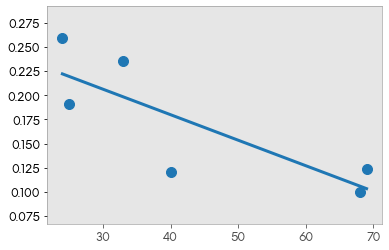

In [35]:
y = df_final_grp.ke
plt.scatter(x, y);
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)));

In [22]:
plt.scatter(df_de_results_grp.female, df_de_results_grp.ke);

NameError: name 'df_de_results_grp' is not defined

### Regress y against Age and Gender

In [ ]:
y_cols = ['ka','Bmax_k12','k21','ke']

In [54]:
for col in y_cols:
    y = df_final_grp[f'{col}'] 
    X = df_final_grp[['age_mean','female']] 
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    #predictions = model.predict(X)
    print(f'\n ----- Y (Dependent Variable) = {col} -----\n')
    print(model.summary())


 ----- Y (Dependent Variable) = ka -----

                            OLS Regression Results                            
Dep. Variable:                     ka   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                 -0.526
Method:                 Least Squares   F-statistic:                    0.1386
Date:                Thu, 23 Jul 2020   Prob (F-statistic):              0.876
Time:                        11:13:21   Log-Likelihood:                 5.3052
No. Observations:                   6   AIC:                            -4.610
Df Residuals:                       3   BIC:                            -5.235
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


### Regress y against Age

In [36]:
for col in y_cols:
    y = df_final_grp[f'{col}'] 
    X = df_final_grp[['age_mean']] 
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    #predictions = model.predict(X)
    print(f'\n ----- Y (Dependent Variable) = {col} -----\n')
    print(model.summary())


 ----- Y (Dependent Variable) = Bmax_k12 -----

                            OLS Regression Results                            
Dep. Variable:               Bmax_k12   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                 -0.159
Method:                 Least Squares   F-statistic:                    0.3156
Date:                Tue, 28 Jul 2020   Prob (F-statistic):              0.604
Time:                        20:43:01   Log-Likelihood:                -21.351
No. Observations:                   6   AIC:                             46.70
Df Residuals:                       4   BIC:                             46.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


### Feature Engineering

In [27]:
df_final_grp_fe = df_final_grp.copy()

In [28]:
df_final_grp_fe['age_squared'] = df_final_grp_fe['age_mean'] ** 2
df_final_grp_fe['age_sqrt'] = np.sqrt(df_final_grp_fe['age_mean'])
df_final_grp_fe['age-female'] = df_final_grp_fe['age_mean'] * df_final_grp_fe['female']

In [29]:
df_final_grp_fe

,age_mean,female,ka,Bmax_k12,k21,ke,age_squared,age_sqrt,age-female
0,24,0,0.503100,32.339672,0.214320,0.258358,576,4.898979,0
1,25,0,0.635096,36.418750,0.238040,0.174284,625,5.000000,0
2,33,0,0.627596,24.769742,0.257975,0.220355,1089,5.744563,0
3,40,1,0.542335,43.505924,0.243524,0.114299,1600,6.324555,40
4,68,1,0.796348,44.773133,0.227913,0.099206,4624,8.246211,68
5,69,0,0.610885,19.936555,0.156706,0.123785,4761,8.306624,0


In [30]:
for col in y_cols:
    y = df_final_grp_fe[f'{col}'] 
    X = df_final_grp_fe[['age_mean','age_squared','age_sqrt']] 
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    #predictions = model.predict(X)
    print(f'\n ----- Y (Dependent Variable) = {col} -----\n')
    print(model.summary())


 ----- Y (Dependent Variable) = ka -----

                            OLS Regression Results                            
Dep. Variable:                     ka   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                 -0.459
Method:                 Least Squares   F-statistic:                    0.4754
Date:                Tue, 21 Jul 2020   Prob (F-statistic):              0.731
Time:                        10:28:16   Log-Likelihood:                 7.3950
No. Observations:                   6   AIC:                            -6.790
Df Residuals:                       2   BIC:                            -7.623
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const  

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


___
# Single Dosing

In [41]:
df_final_single_grp

,age_mean,female,ka,Bmax_k12,k21,ke,KM,age_squared,age_sqrt,age-female
0,25,0,0.85,12.609896,0.849979,0.222515,14.3,625,5.000000,0
1,33,0,0.85,34.780246,0.850000,0.208736,14.3,1089,5.744563,0
2,40,1,0.85,21.692428,0.406710,0.113413,14.3,1600,6.324555,40
3,68,1,0.85,10.718218,0.160221,0.089300,14.3,4624,8.246211,68
4,69,0,0.85,8.000973,0.139810,0.101966,14.3,4761,8.306624,0


In [37]:
x = df_final_single_grp.age_mean

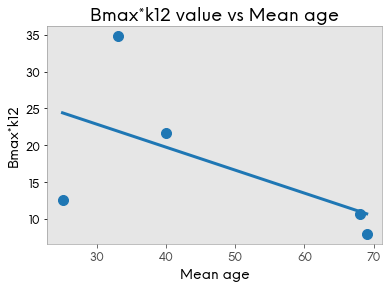

In [38]:
y = df_final_single_grp.Bmax_k12
plt.scatter(x, y);
plt.title('Bmax*k12 value vs Mean age')
plt.xlabel('Mean age')
plt.ylabel('Bmax*k12')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)));

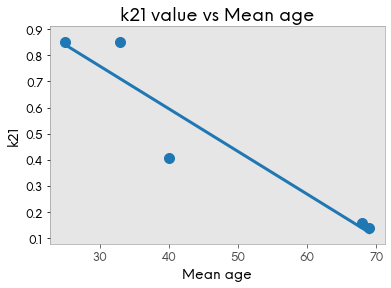

In [39]:
y = df_final_single_grp.k21
plt.scatter(x, y);
plt.title('k21 value vs Mean age')
plt.xlabel('Mean age')
plt.ylabel('k21')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)));

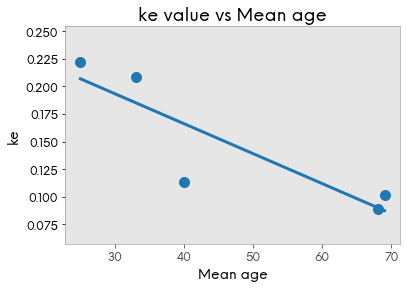

In [30]:
y = df_final_single_grp.ke
plt.scatter(x, y);
plt.title('ke value vs Mean age')
plt.xlabel('Mean age')
plt.ylabel('ke')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)));

### Regress y against Age and Gender

In [20]:
y_cols = ['Bmax_k12','k21','ke']

In [21]:
for col in y_cols:
    y = df_final_single_grp[f'{col}'] 
    X = df_final_single_grp[['age_mean','female']] 
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    #predictions = model.predict(X)
    print(f'\n ----- Y (Dependent Variable) = {col} -----\n')
    print(model.summary())


 ----- Y (Dependent Variable) = Bmax_k12 -----

                            OLS Regression Results                            
Dep. Variable:               Bmax_k12   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                 -0.316
Method:                 Least Squares   F-statistic:                    0.5199
Date:                Tue, 28 Jul 2020   Prob (F-statistic):              0.658
Time:                        16:32:03   Log-Likelihood:                -17.440
No. Observations:                   5   AIC:                             40.88
Df Residuals:                       2   BIC:                             39.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


### Regress against Age alone

In [40]:
for col in y_cols:
    y = df_final_single_grp[f'{col}'] 
    X = df_final_single_grp['age_mean'] 
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    #predictions = model.predict(X)
    print(f'\n ----- Y (Dependent Variable) = {col} -----\n')
    print(model.summary())


 ----- Y (Dependent Variable) = Bmax_k12 -----

                            OLS Regression Results                            
Dep. Variable:               Bmax_k12   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     1.523
Date:                Tue, 28 Jul 2020   Prob (F-statistic):              0.305
Time:                        21:20:23   Log-Likelihood:                -17.460
No. Observations:                   5   AIC:                             38.92
Df Residuals:                       3   BIC:                             38.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


### Feature Engineering (Single Dosing)

In [22]:
df_final_single_grp['age_squared'] = df_final_single_grp['age_mean'] ** 2
df_final_single_grp['age_sqrt'] = np.sqrt(df_final_single_grp['age_mean'])
df_final_single_grp['age-female'] = df_final_single_grp['age_mean'] * df_final_single_grp['female']

In [23]:
for col in y_cols:
    y = df_final_single_grp[f'{col}'] 
    X = df_final_single_grp['age_mean']
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    #predictions = model.predict(X)
    print(f'\n ----- Y (Dependent Variable) = {col} -----\n')
    print(model.summary())


 ----- Y (Dependent Variable) = Bmax_k12 -----

                            OLS Regression Results                            
Dep. Variable:               Bmax_k12   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     1.523
Date:                Tue, 28 Jul 2020   Prob (F-statistic):              0.305
Time:                        16:43:49   Log-Likelihood:                -17.460
No. Observations:                   5   AIC:                             38.92
Df Residuals:                       3   BIC:                             38.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [24]:
for col in y_cols:
    y = df_final_single_grp[f'{col}'] 
    X = df_final_single_grp['age_squared']
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    #predictions = model.predict(X)
    print(f'\n ----- Y (Dependent Variable) = {col} -----\n')
    print(model.summary())


 ----- Y (Dependent Variable) = Bmax_k12 -----

                            OLS Regression Results                            
Dep. Variable:               Bmax_k12   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1.974
Date:                Tue, 28 Jul 2020   Prob (F-statistic):              0.255
Time:                        17:08:41   Log-Likelihood:                -17.222
No. Observations:                   5   AIC:                             38.44
Df Residuals:                       3   BIC:                             37.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
c

C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [63]:
for col in y_cols:
    y = df_final_single_grp[f'{col}'] 
    X = df_final_single_grp[['age_squared','age-female']]
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    #predictions = model.predict(X)
    print(f'\n ----- Y (Dependent Variable) = {col} -----\n')
    print(model.summary())


 ----- Y (Dependent Variable) = Bmax_k12 -----

                            OLS Regression Results                            
Dep. Variable:               Bmax_k12   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     3.585
Date:                Thu, 23 Jul 2020   Prob (F-statistic):              0.218
Time:                        11:19:28   Log-Likelihood:                -13.999
No. Observations:                   5   AIC:                             34.00
Df Residuals:                       2   BIC:                             32.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
c

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


___
# Multi Dosing

In [46]:
df_final_multi_grp

,age_mean,female,ka,Bmax_k12,k21,ke,KM
0,24,0,0.503835,32.233391,0.215479,0.258735,14.3
1,25,0,0.630026,40.312197,0.180921,0.185629,14.3
2,33,0,0.690860,37.319508,0.310932,0.262608,14.3
3,40,1,0.468066,74.991816,0.316420,0.127125,14.3
4,68,1,0.433325,71.988701,0.221176,0.111207,14.3
5,69,0,0.274568,30.969193,0.155371,0.144918,14.3


In [47]:
x = df_final_multi_grp.age_mean

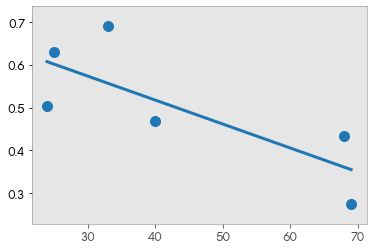

In [48]:
y = df_final_multi_grp.ka
plt.scatter(x, y);
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)));

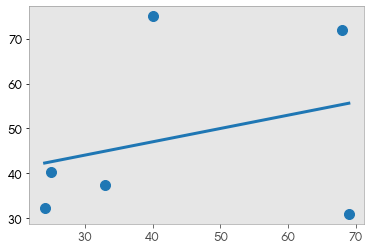

In [49]:
y = df_final_multi_grp.Bmax_k12
plt.scatter(x, y);
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)));

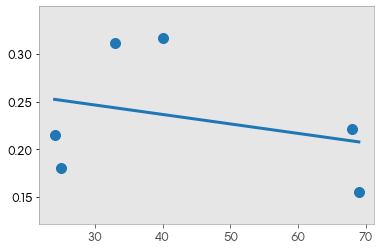

In [50]:
y = df_final_multi_grp.k21
plt.scatter(x, y);
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)));

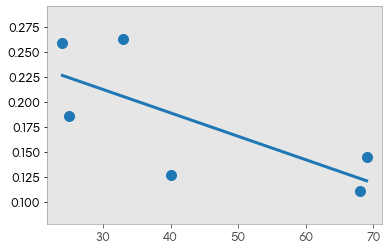

In [51]:
y = df_final_multi_grp.ke
plt.scatter(x, y);
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)));

In [52]:
y_cols = ['ka','Bmax_k12','k21','ke']

In [53]:
for col in y_cols:
    y = df_final_multi_grp[f'{col}'] 
    X = df_final_multi_grp[['age_mean','female']] 
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    #predictions = model.predict(X)
    print(f'\n ----- Y (Dependent Variable) = {col} -----\n')
    print(model.summary())


 ----- Y (Dependent Variable) = ka -----

                            OLS Regression Results                            
Dep. Variable:                     ka   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     2.306
Date:                Tue, 28 Jul 2020   Prob (F-statistic):              0.247
Time:                        22:35:12   Log-Likelihood:                 6.2865
No. Observations:                   6   AIC:                            -6.573
Df Residuals:                       3   BIC:                            -7.198
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
C:\Users\klty0\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


### Feature Engineering (Multiple Dosing)

In [2]:
y_cols = ['ka','Bmax_k12','k21','ke']

In [65]:
df_final_multi_grp['age_squared'] = df_final_multi_grp['age_mean'] ** 2
df_final_multi_grp['age_sqrt'] = np.sqrt(df_final_multi_grp['age_mean'])
df_final_multi_grp['age-female'] = df_final_multi_grp['age_mean'] * df_final_multi_grp['female']

In [67]:
for col in y_cols:
    y = df_final_multi_grp[f'{col}'] 
    X = df_final_multi_grp['age_mean']
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    #predictions = model.predict(X)
    print(f'\n ----- Y (Dependent Variable) = {col} -----\n')
    print(model.summary())


 ----- Y (Dependent Variable) = ka -----

                            OLS Regression Results                            
Dep. Variable:                     ka   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     4.911
Date:                Thu, 23 Jul 2020   Prob (F-statistic):             0.0910
Time:                        11:24:35   Log-Likelihood:                 5.9700
No. Observations:                   6   AIC:                            -7.940
Df Residuals:                       4   BIC:                            -8.356
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [1]:
for col in y_cols:
    y = df_final_multi_grp[f'{col}'] 
    X = df_final_multi_grp['age_squared']
    X = sm.add_constant(X) 
    model = sm.OLS(y, X).fit() 
    #predictions = model.predict(X)
    print(f'\n ----- Y (Dependent Variable) = {col} -----\n')
    print(model.summary())

NameError: name 'y_cols' is not defined